In [85]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
import matplotlib.pyplot as plt


import seaborn as sns

In [86]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

In [87]:
X_train['IHPSOV'].unique()

array([nan,  0.])

In [88]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47794 entries, 0 to 47793
Data columns (total 53 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   engine_id        47794 non-null  object 
 1   aircraft_id      47794 non-null  object 
 2   flight_datetime  47794 non-null  object 
 3   flight_phase     47794 non-null  object 
 4   engine_position  47794 non-null  int64  
 5   n1_modifier      47794 non-null  float64
 6   number_blades    47794 non-null  float64
 7   engine_family    47794 non-null  object 
 8   engine_type      47794 non-null  object 
 9   manufacturer     47794 non-null  object 
 10  ZHPTAC           11957 non-null  float64
 11  ZLPTAC           11957 non-null  float64
 12  ZPCN12           47794 non-null  float64
 13  ZPCN25           47794 non-null  float64
 14  ZPHSF            13336 non-null  float64
 15  ZPHSR            13336 non-null  float64
 16  ZPN12R           18382 non-null  float64
 17  ZPOIL       

In [89]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47794 entries, 0 to 47793
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   flight_datetime  47794 non-null  object 
 1   flight_phase     47794 non-null  object 
 2   engine_id        47794 non-null  object 
 3   BRAT             47721 non-null  float64
 4   DEGT             28279 non-null  float64
 5   DELFN            9880 non-null   float64
 6   DELN1            9880 non-null   float64
 7   DELVSV           11884 non-null  float64
 8   DPOIL            19250 non-null  float64
 9   EGTC             28279 non-null  float64
 10  EGTHDM           36961 non-null  float64
 11  EGTHDM_D         18993 non-null  float64
 12  GEGTMC           19203 non-null  float64
 13  GN2MC            19203 non-null  float64
 14  GPCN25           28279 non-null  float64
 15  GWFM             28279 non-null  float64
 16  PCN12            47512 non-null  float64
 17  PCN12I      

In [90]:
##AGW',
#'CAS',
#'IAI',
#'IVS12',
#'SAT',
#'ZALT',
#'ZT1A',
#'ZVIAS',
#'ZWBP1',
#'ZWBP1_8E',
#'ZWBP2',
#'ZWBP2_8E',
#'ZXM'##

<AxesSubplot:>

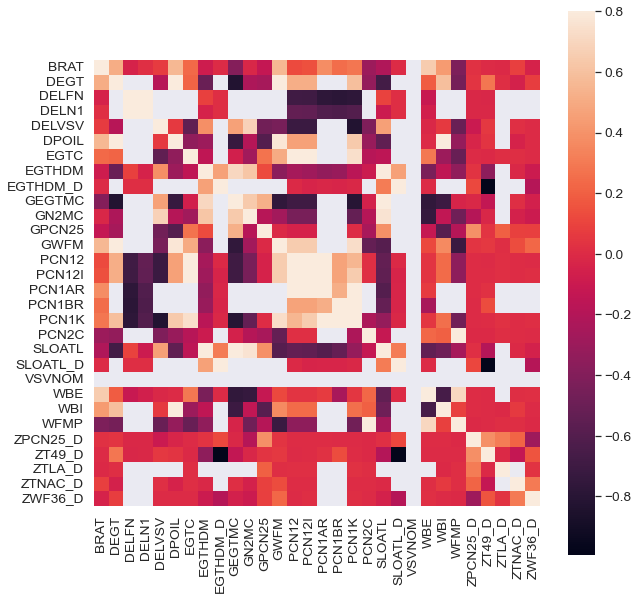

In [91]:
corrmat = y_test.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, vmax=.8, square=True)

<AxesSubplot:>

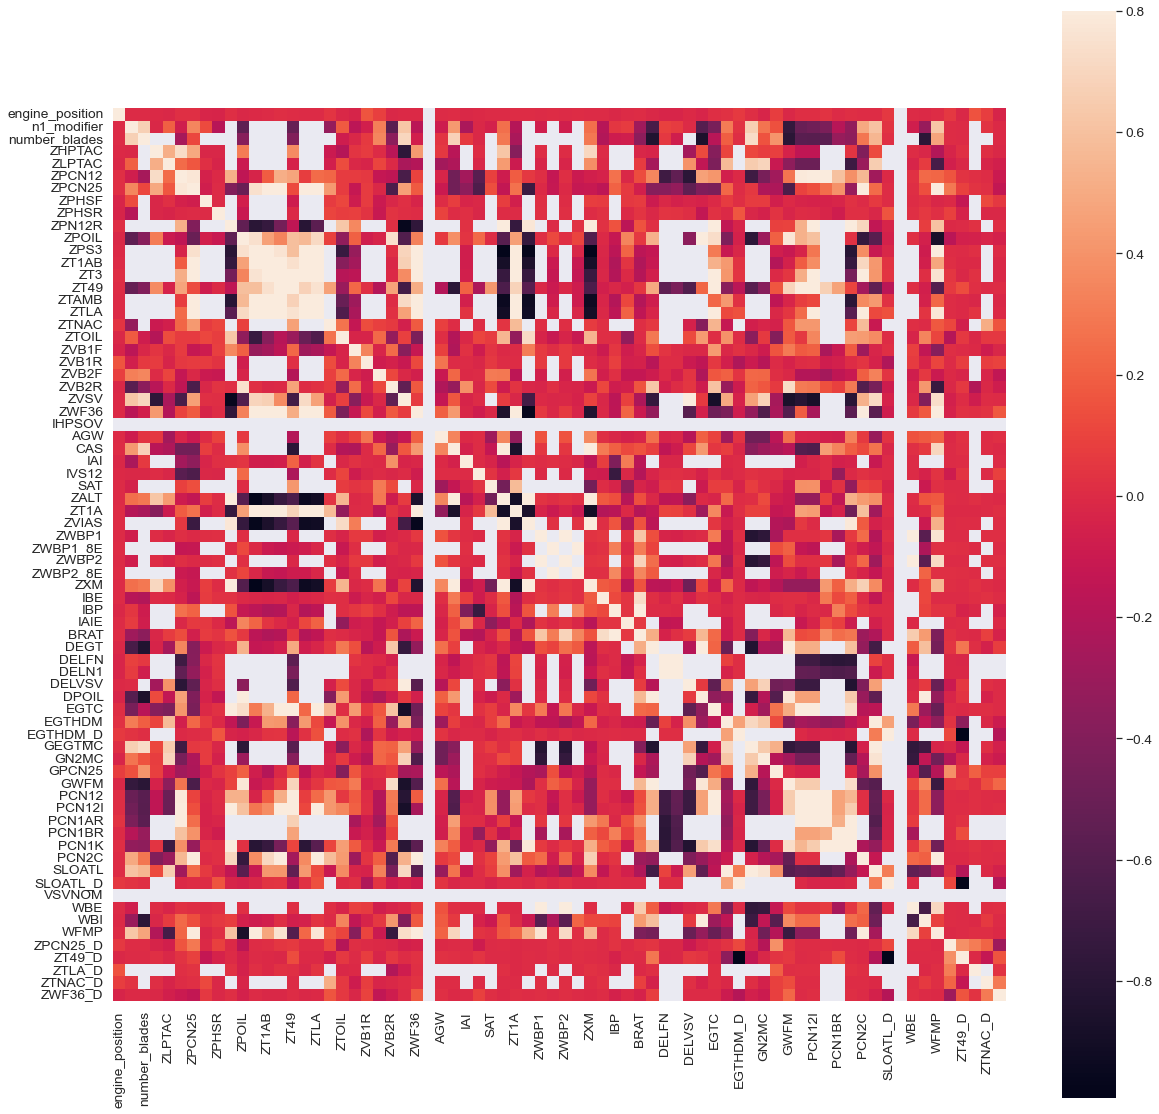

In [92]:
corrmat = X_test.merge(y_test).corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, vmax=.8, square=True)

In [93]:
df= X_train.merge(y_train).fillna(0)
columns_without_nan = lambda df: df.loc[:, df.notna().all(axis=0)].columns # колонки, не содержащие NaN
df = df[columns_without_nan(df)]
cols = [i for i in df.columns if df[i].dtypes != 'O']


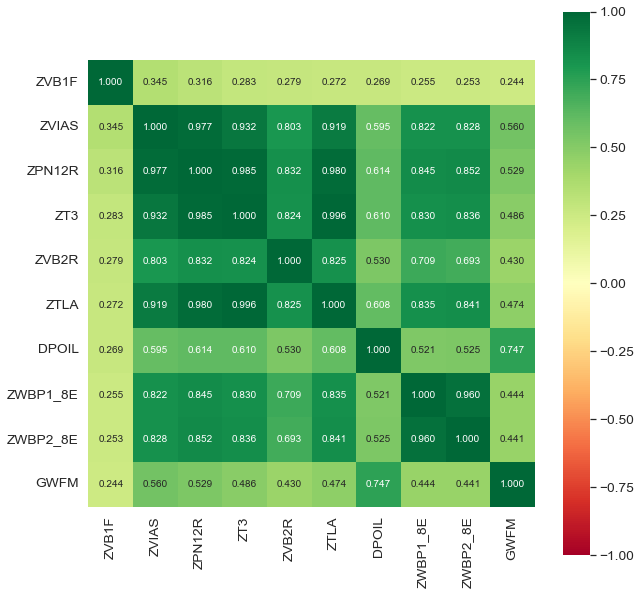

In [94]:

param = 'ZVB1F'
k = 10
corrmat = df.corr()
cols = corrmat.nlargest(k, param)[param].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
plt.figure(figsize = (10, 10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True,
fmt='.3f', annot_kws={'size': 10}, cmap='RdYlGn',
center=0, vmax=1, vmin=-1,
yticklabels=cols.values, xticklabels=cols.values)


In [95]:
# Если 0, то все значения пусты. Если 1, то Заполненны. Иначе это доля заполненных значений.
col = 'engine_type'
df = pd.DataFrame(index=columns_with_nan(y_train), columns=y_train[col].unique())
for i in df.columns:
    df1 = y_train[y_train[col] == i]
    for j in df.index:
        df.loc[j, i] = 1 - df1[df1[j].isna()].shape[0]/df1.shape[0]
# df.to_csv('manufacturer_params.csv')
df

KeyError: 'engine_type'

In [96]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47794 entries, 0 to 47793
Data columns (total 53 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   engine_id        47794 non-null  object 
 1   aircraft_id      47794 non-null  object 
 2   flight_datetime  47794 non-null  object 
 3   flight_phase     47794 non-null  object 
 4   engine_position  47794 non-null  int64  
 5   n1_modifier      47794 non-null  float64
 6   number_blades    47794 non-null  float64
 7   engine_family    47794 non-null  object 
 8   engine_type      47794 non-null  object 
 9   manufacturer     47794 non-null  object 
 10  ZHPTAC           11957 non-null  float64
 11  ZLPTAC           11957 non-null  float64
 12  ZPCN12           47794 non-null  float64
 13  ZPCN25           47794 non-null  float64
 14  ZPHSF            13336 non-null  float64
 15  ZPHSR            13336 non-null  float64
 16  ZPN12R           18382 non-null  float64
 17  ZPOIL       

In [97]:
numerical_train_features = [i for i in X_train.columns if X_train[i].dtypes != 'O']
categorial_train_features = [i for i in X_train.columns if X_train[i].dtypes == 'O']

In [98]:
columns_without_nan = lambda df: df.loc[:, df.notna().all(axis=0)].columns # колонки, не содержащие NaN
columns_with_nan = lambda df: df.loc[:, df.isna().any(axis=0)].columns # колонки, содержащие NaN

In [99]:
# Если 0, то все значения пусты. Если 1, то Заполненны. Иначе это доля заполненных значений.
col = 'aircraft_type'
df = pd.DataFrame(index=columns_with_nan(X_train), columns=X_train[col].unique())
for i in df.columns:
    df1 = X_train[X_train[col] == i]
    for j in df.index:
        df.loc[j, i] = 1 - df1[df1[j].isna()].shape[0]/df1.shape[0]
# df.to_csv('manufacturer_params.csv')
df

,A320-200,ERJ170,B737-800,A321-200
ZHPTAC,0.803416,0.0,0.0,0.898343
ZLPTAC,0.803416,0.0,0.0,0.898343
ZPHSF,0.999517,0.0,0.0,0.736829
ZPHSR,0.999517,0.0,0.0,0.736829
ZPN12R,0.0,0.999946,0.0,0.0
ZPOIL,0.803416,1.0,0.502066,0.894385
ZPS3,0.0,0.999891,0.0,0.0
ZT1AB,0.0,0.999946,0.0,0.0
ZT3,0.0,0.999891,0.0,0.0
ZTAMB,0.0,1.0,0.0,0.0


In [100]:
# Если 0, то все значения пусты. Если 1, то Заполненны. Иначе это доля заполненных значений.
col = 'engine_type'
df = pd.DataFrame(index=columns_with_nan(X_train), columns=X_train[col].unique())
for i in df.columns:
    df1 = X_train[X_train[col] == i]
    for j in df.index:
        df.loc[j, i] = 1 - df1[df1[j].isna()].shape[0]/df1.shape[0]
# df.to_csv('manufacturer_params.csv')
df

,CFM56-5B4,CF34-8E5,CFM56-7B27/B1,CFM56-7B26,CFM56-5B3
ZHPTAC,0.803416,0.0,0.0,0.0,0.898343
ZLPTAC,0.803416,0.0,0.0,0.0,0.898343
ZPHSF,0.999517,0.0,0.0,0.0,0.736829
ZPHSR,0.999517,0.0,0.0,0.0,0.736829
ZPN12R,0.0,0.999946,0.0,0.0,0.0
ZPOIL,0.803416,1.0,0.512959,0.500532,0.894385
ZPS3,0.0,0.999891,0.0,0.0,0.0
ZT1AB,0.0,0.999946,0.0,0.0,0.0
ZT3,0.0,0.999891,0.0,0.0,0.0
ZTAMB,0.0,1.0,0.0,0.0,0.0


In [101]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47794 entries, 0 to 47793
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   flight_datetime  47794 non-null  object 
 1   flight_phase     47794 non-null  object 
 2   engine_id        47794 non-null  object 
 3   BRAT             47721 non-null  float64
 4   DEGT             28279 non-null  float64
 5   DELFN            9880 non-null   float64
 6   DELN1            9880 non-null   float64
 7   DELVSV           11884 non-null  float64
 8   DPOIL            19250 non-null  float64
 9   EGTC             28279 non-null  float64
 10  EGTHDM           36961 non-null  float64
 11  EGTHDM_D         18993 non-null  float64
 12  GEGTMC           19203 non-null  float64
 13  GN2MC            19203 non-null  float64
 14  GPCN25           28279 non-null  float64
 15  GWFM             28279 non-null  float64
 16  PCN12            47512 non-null  float64
 17  PCN12I      

In [102]:
y_train = pd.merge(X_train[categorial_train_features], y_train,
                   on=["engine_id", "flight_datetime", "flight_phase"])
y_test = pd.merge(X_test[categorial_train_features], y_test,
                   on=["engine_id", "flight_datetime", "flight_phase"])

In [103]:
X_train[(X_train['aircraft_id'] == 'e76f16073383e00122d6e8bfd16373833cedc148c4131c56cd7c92cea6b91ca8')
        & (X_train['flight_phase'] == 'CRUISE')
        & (['2022-05-23 20' in i for i in X_train['flight_datetime']])]

,engine_id,aircraft_id,flight_datetime,flight_phase,engine_position,n1_modifier,number_blades,engine_family,engine_type,manufacturer,ZHPTAC,ZLPTAC,ZPCN12,ZPCN25,ZPHSF,ZPHSR,ZPN12R,ZPOIL,ZPS3,ZT1AB,ZT3,ZT49,ZTAMB,ZTLA,ZTNAC,ZTOIL,ZVB1F,ZVB1R,ZVB2F,ZVB2R,ZVSV,ZWF36,IHPSOV,aircraft_family,aircraft_type,aircraft_grp,ac_manufacturer,AGW,CAS,IAI,IVS12,SAT,ZALT,ZT1A,ZVIAS,ZWBP1,ZWBP1_8E,ZWBP2,ZWBP2_8E,ZXM,IBE,IBP,IAIE
5358,88a5b305e53116af2f6cfca0631bf93068d643e105cd47...,e76f16073383e00122d6e8bfd16373833cedc148c4131c...,2022-05-23 20:49:06,CRUISE,2,0.0,28.0,CF34-8E,CF34-8E5,GE AIRCRAFT ENGINES,NaN,NaN,82.437500,82.671799,NaN,NaN,89.0625,76.476097,118.561996,-26.5937,379.687012,691.625000,-49.900002,57.281200,NaN,82.156197,0.716796,NaN,NaN,2.375,-0.1875,1739.87000,0.0,EMBRAER RJ,ERJ170,EMBRAER 170-100,EMBRAER,NaN,NaN,NaN,NaN,NaN,32010.0000,-25.900000,264.100006,NaN,25.5781,NaN,27.070299,0.7330,1.0,1.0,0.0
15873,60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e...,e76f16073383e00122d6e8bfd16373833cedc148c4131c...,2022-05-23 20:51:39,CRUISE,1,0.0,28.0,CF34-8E,CF34-8E5,GE AIRCRAFT ENGINES,NaN,NaN,81.690002,82.320000,NaN,NaN,NaN,75.250000,NaN,NaN,NaN,709.609985,401.839996,57.380001,NaN,82.699997,0.700000,NaN,NaN,0.810,NaN,1776.40002,0.0,EMBRAER RJ,ERJ170,EMBRAER 170-100,EMBRAER,NaN,NaN,NaN,NaN,NaN,31998.5996,-26.120001,NaN,NaN,0.4900,NaN,0.450000,0.7298,1.0,1.0,0.0


In [104]:
X_train[(X_train['engine_type'] == 'CF34-8E5') & (X_train['ZPN12R'].isna())].iloc[0]

engine_id          60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e...
aircraft_id        e76f16073383e00122d6e8bfd16373833cedc148c4131c...
flight_datetime                                  2022-05-23 20:51:39
flight_phase                                                  CRUISE
engine_position                                                    1
n1_modifier                                                      0.0
number_blades                                                   28.0
engine_family                                                CF34-8E
engine_type                                                 CF34-8E5
manufacturer                                     GE AIRCRAFT ENGINES
ZHPTAC                                                           NaN
ZLPTAC                                                           NaN
ZPCN12                                                     81.690002
ZPCN25                                                         82.32
ZPHSF                             

In [105]:
 y_test.isna().sum().sum() / (y_test.shape[0] * y_test.shape[1])

0.3340384109981909

In [106]:
y_train.isna().sum().sum() / (y_train.shape[0] * y_train.shape[1])

0.33387852541955976

In [107]:
y_train.iloc[:,5].value_counts()[0] / y_train.iloc[:,5].value_counts().sum()

0.3846298698581412

In [108]:
y_test.iloc[:,5].value_counts()[0] / y_test.iloc[:,5].value_counts().sum()

0.38283293231509574